Importing all the libraries that we will need for machine learning

In [1]:
#Knn
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature
from skimage import draw as drw
import matplotlib.ticker as plticker
from PIL import Image, ImageDraw
import matplotlib.patches as patches
import csv
import math
%matplotlib inline
from IPython.display import HTML, display
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd
from pandas import DataFrame
import csv
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn import preprocessing
import timeit
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import ImageFilter
from scipy import ndimage, misc

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load Retina Image

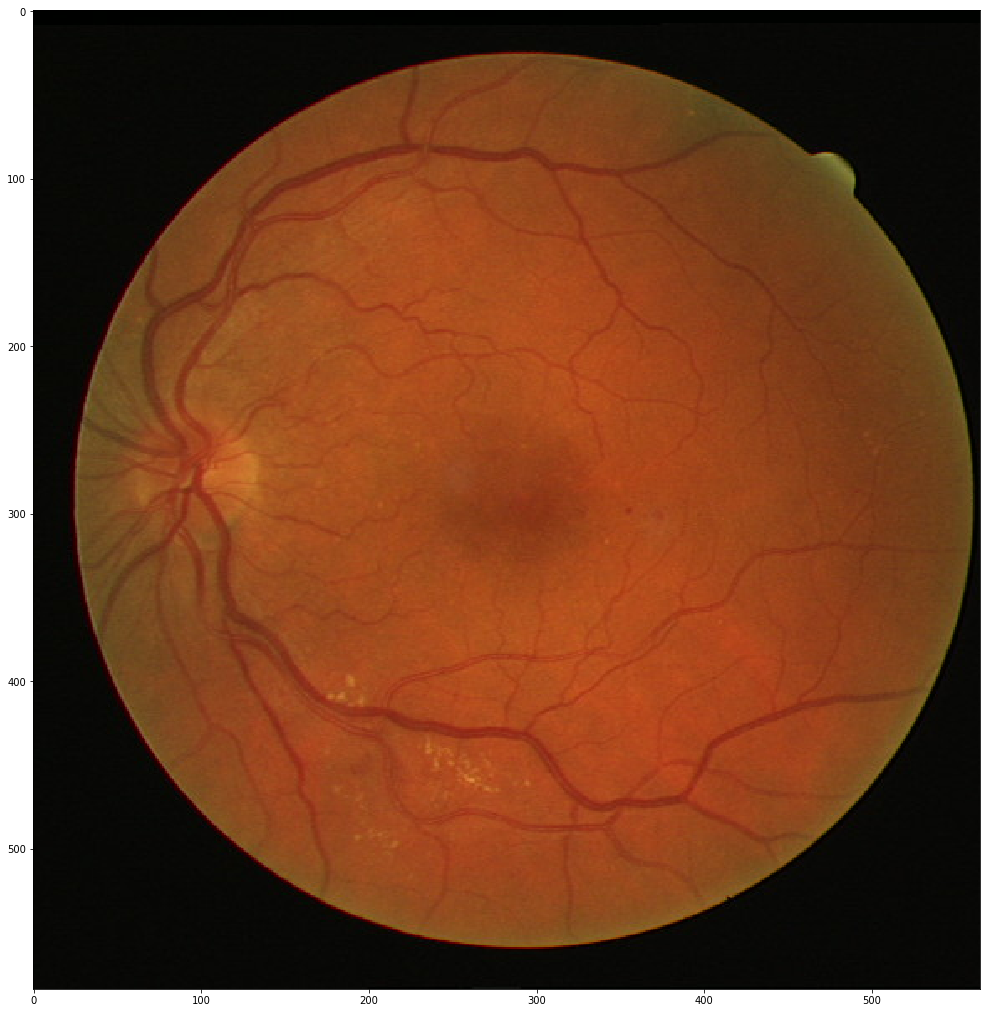

In [2]:
my_image = '03_test.tif' 

# Load and Display Retina Image 
plt.figure(figsize=(20,18))
img=mpimg.imread(my_image)
imgplot = plt.imshow(img)
plt.show()

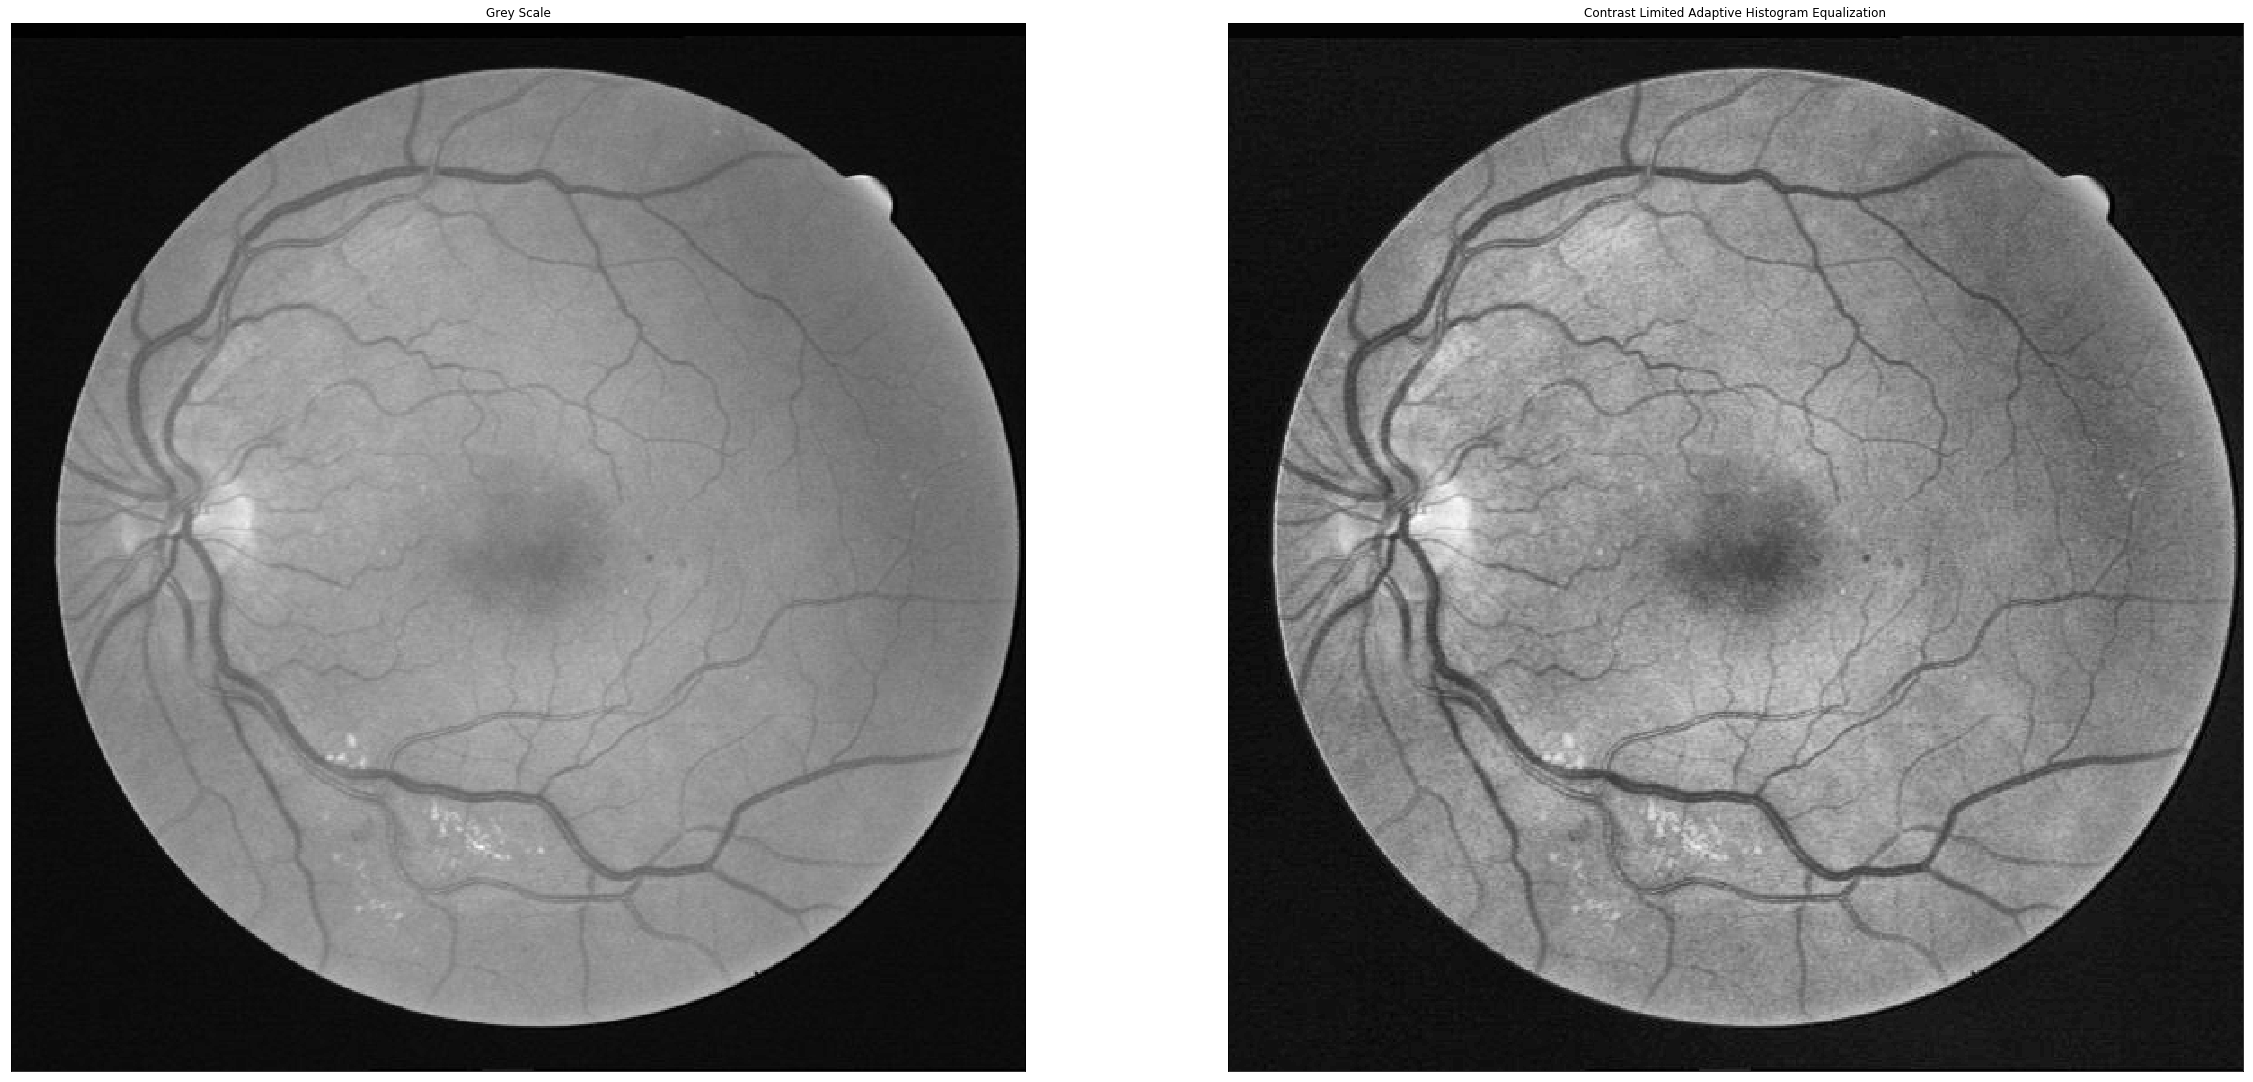

96.0


In [33]:
# importing image for testing
retina_image =  my_image 

# Converting image into grey scale 
retina = data.imread(retina_image)
retina_grey = color.rgb2grey(retina)

image = cv2.imread(my_image,0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(image)
##########################################################

plt.figure(figsize=(40,38))
plt.subplot(121),plt.imshow(retina_grey,cmap="gray"),plt.title('Grey Scale')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cl1,cmap="gray"),plt.title('Contrast Limited Adaptive Histogram Equalization')
plt.xticks([]), plt.yticks([])
plt.show()

v0 = np.median(cl1)
print(v0)


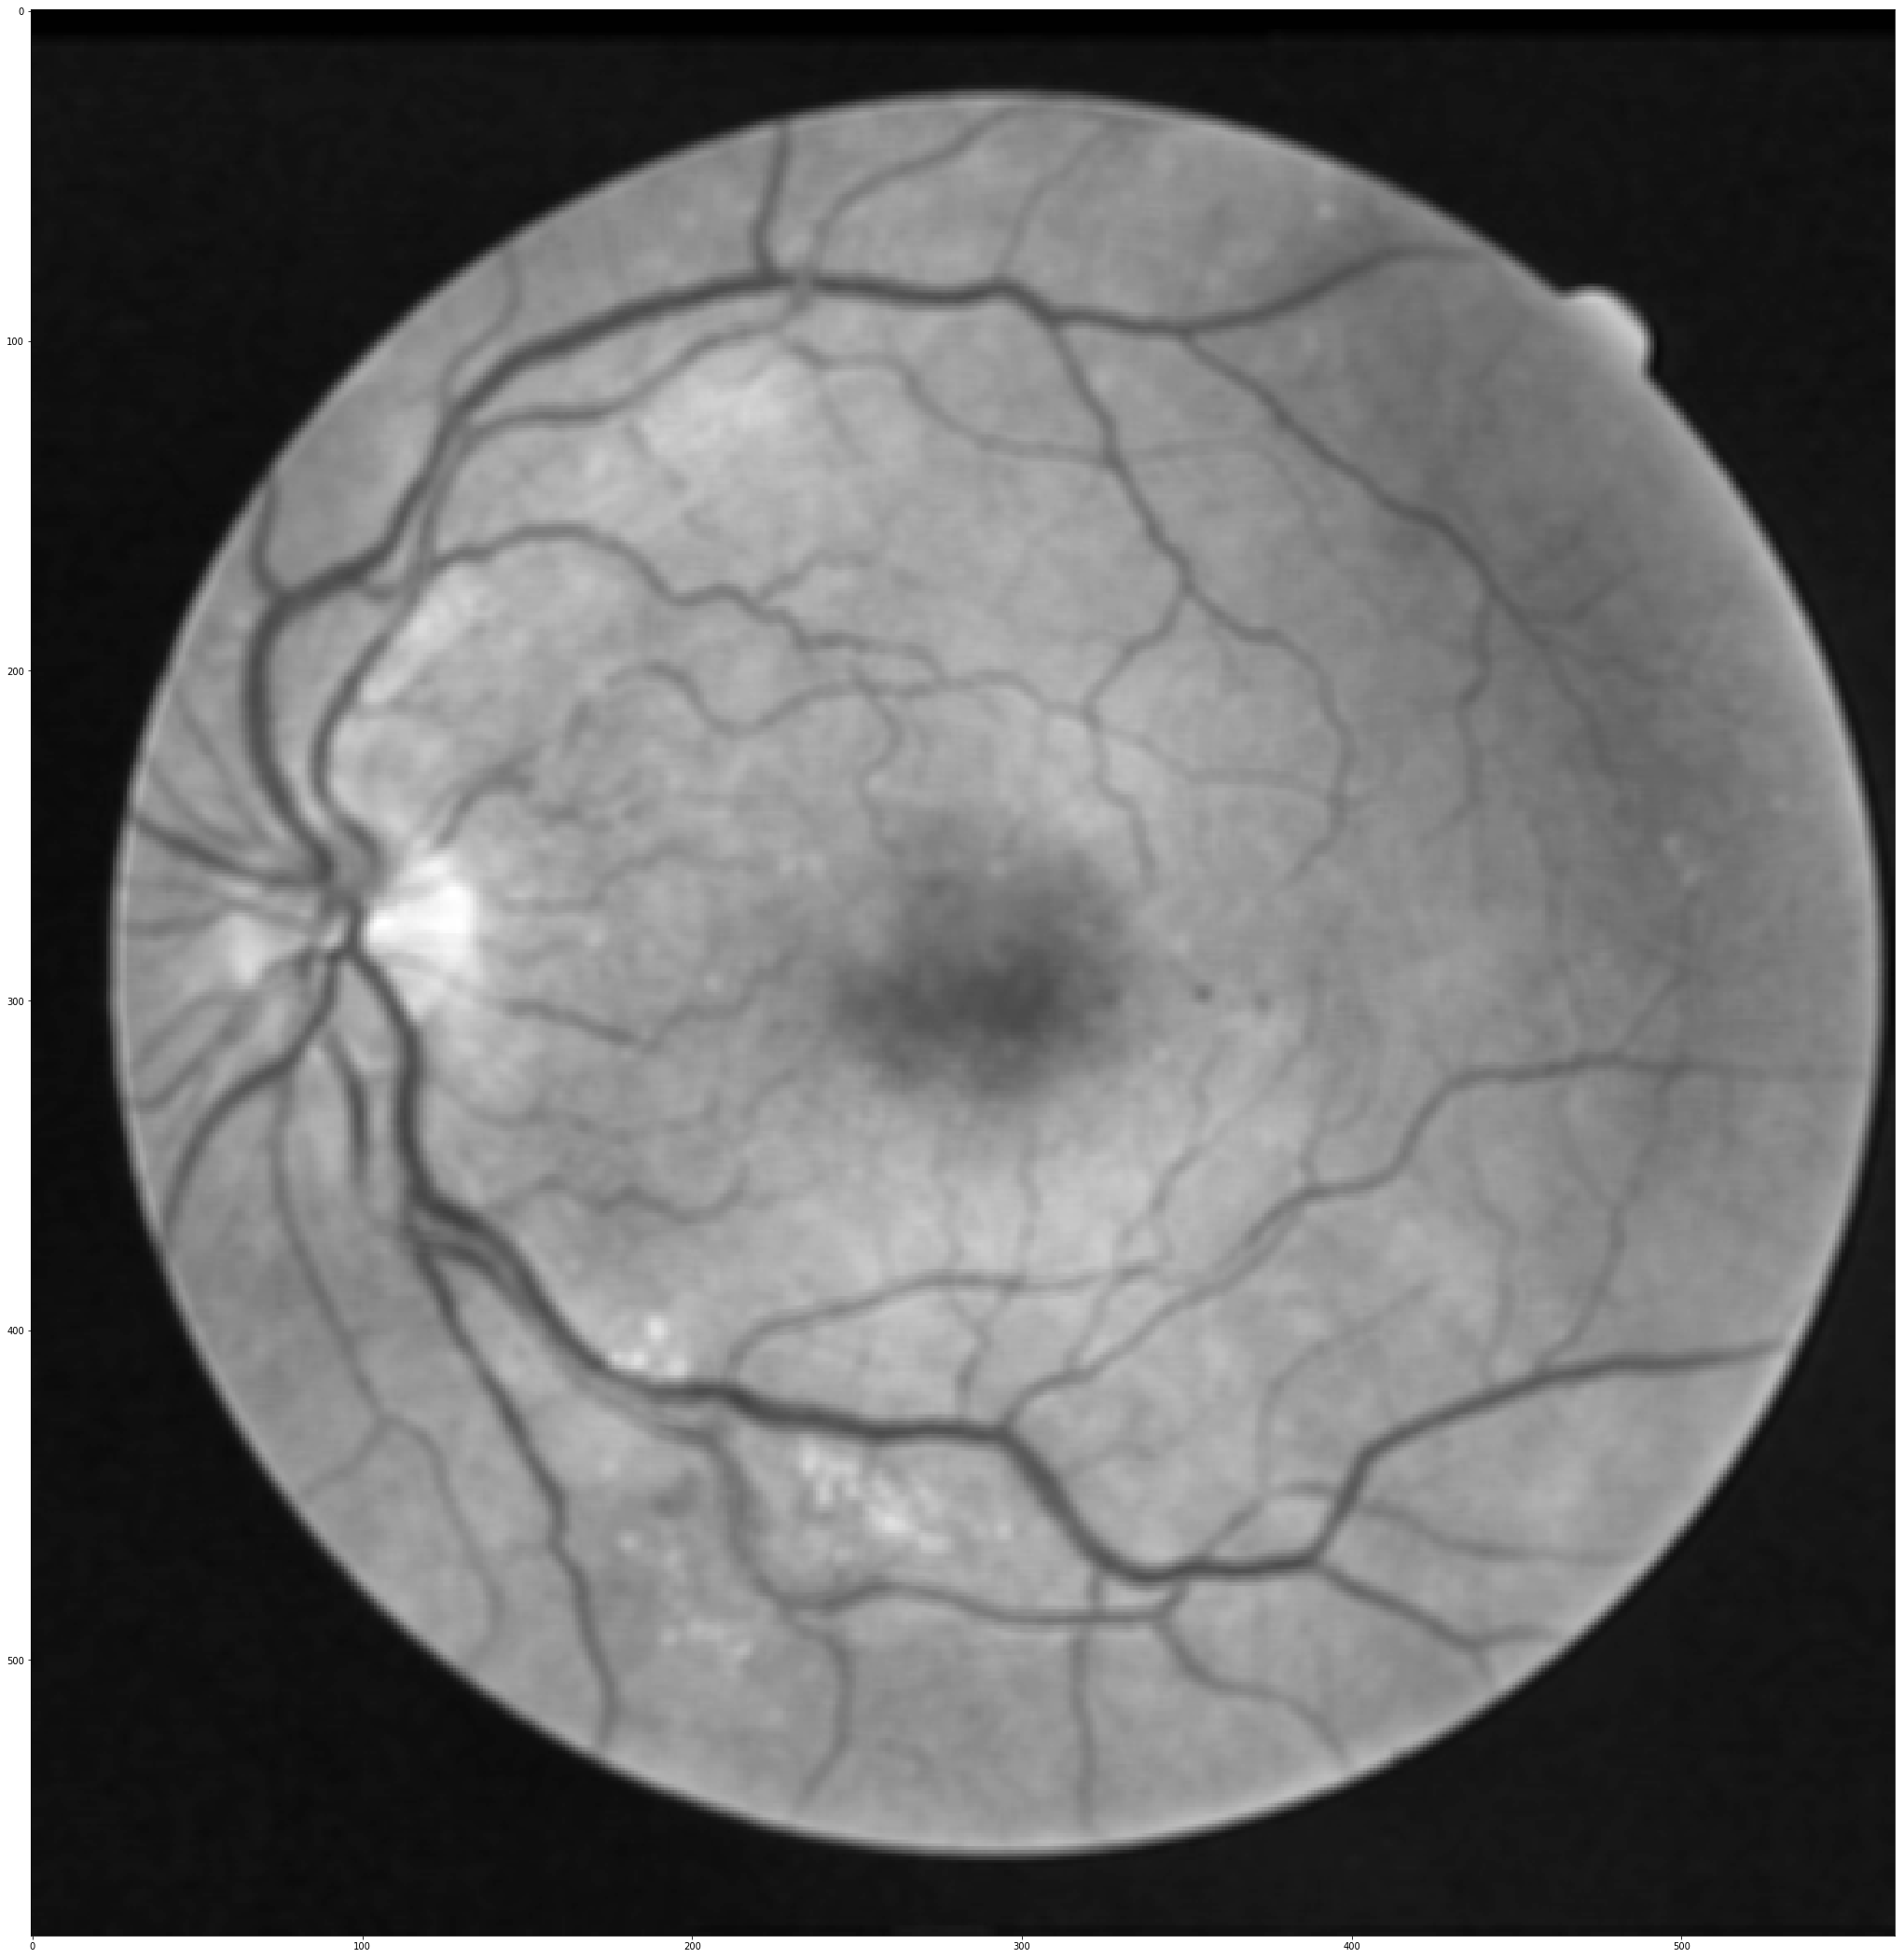

In [63]:
# average filtering 
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(cl1,-1,kernel)
plt.figure(figsize=(40,38),)
plt.imshow(dst,cmap="gray")

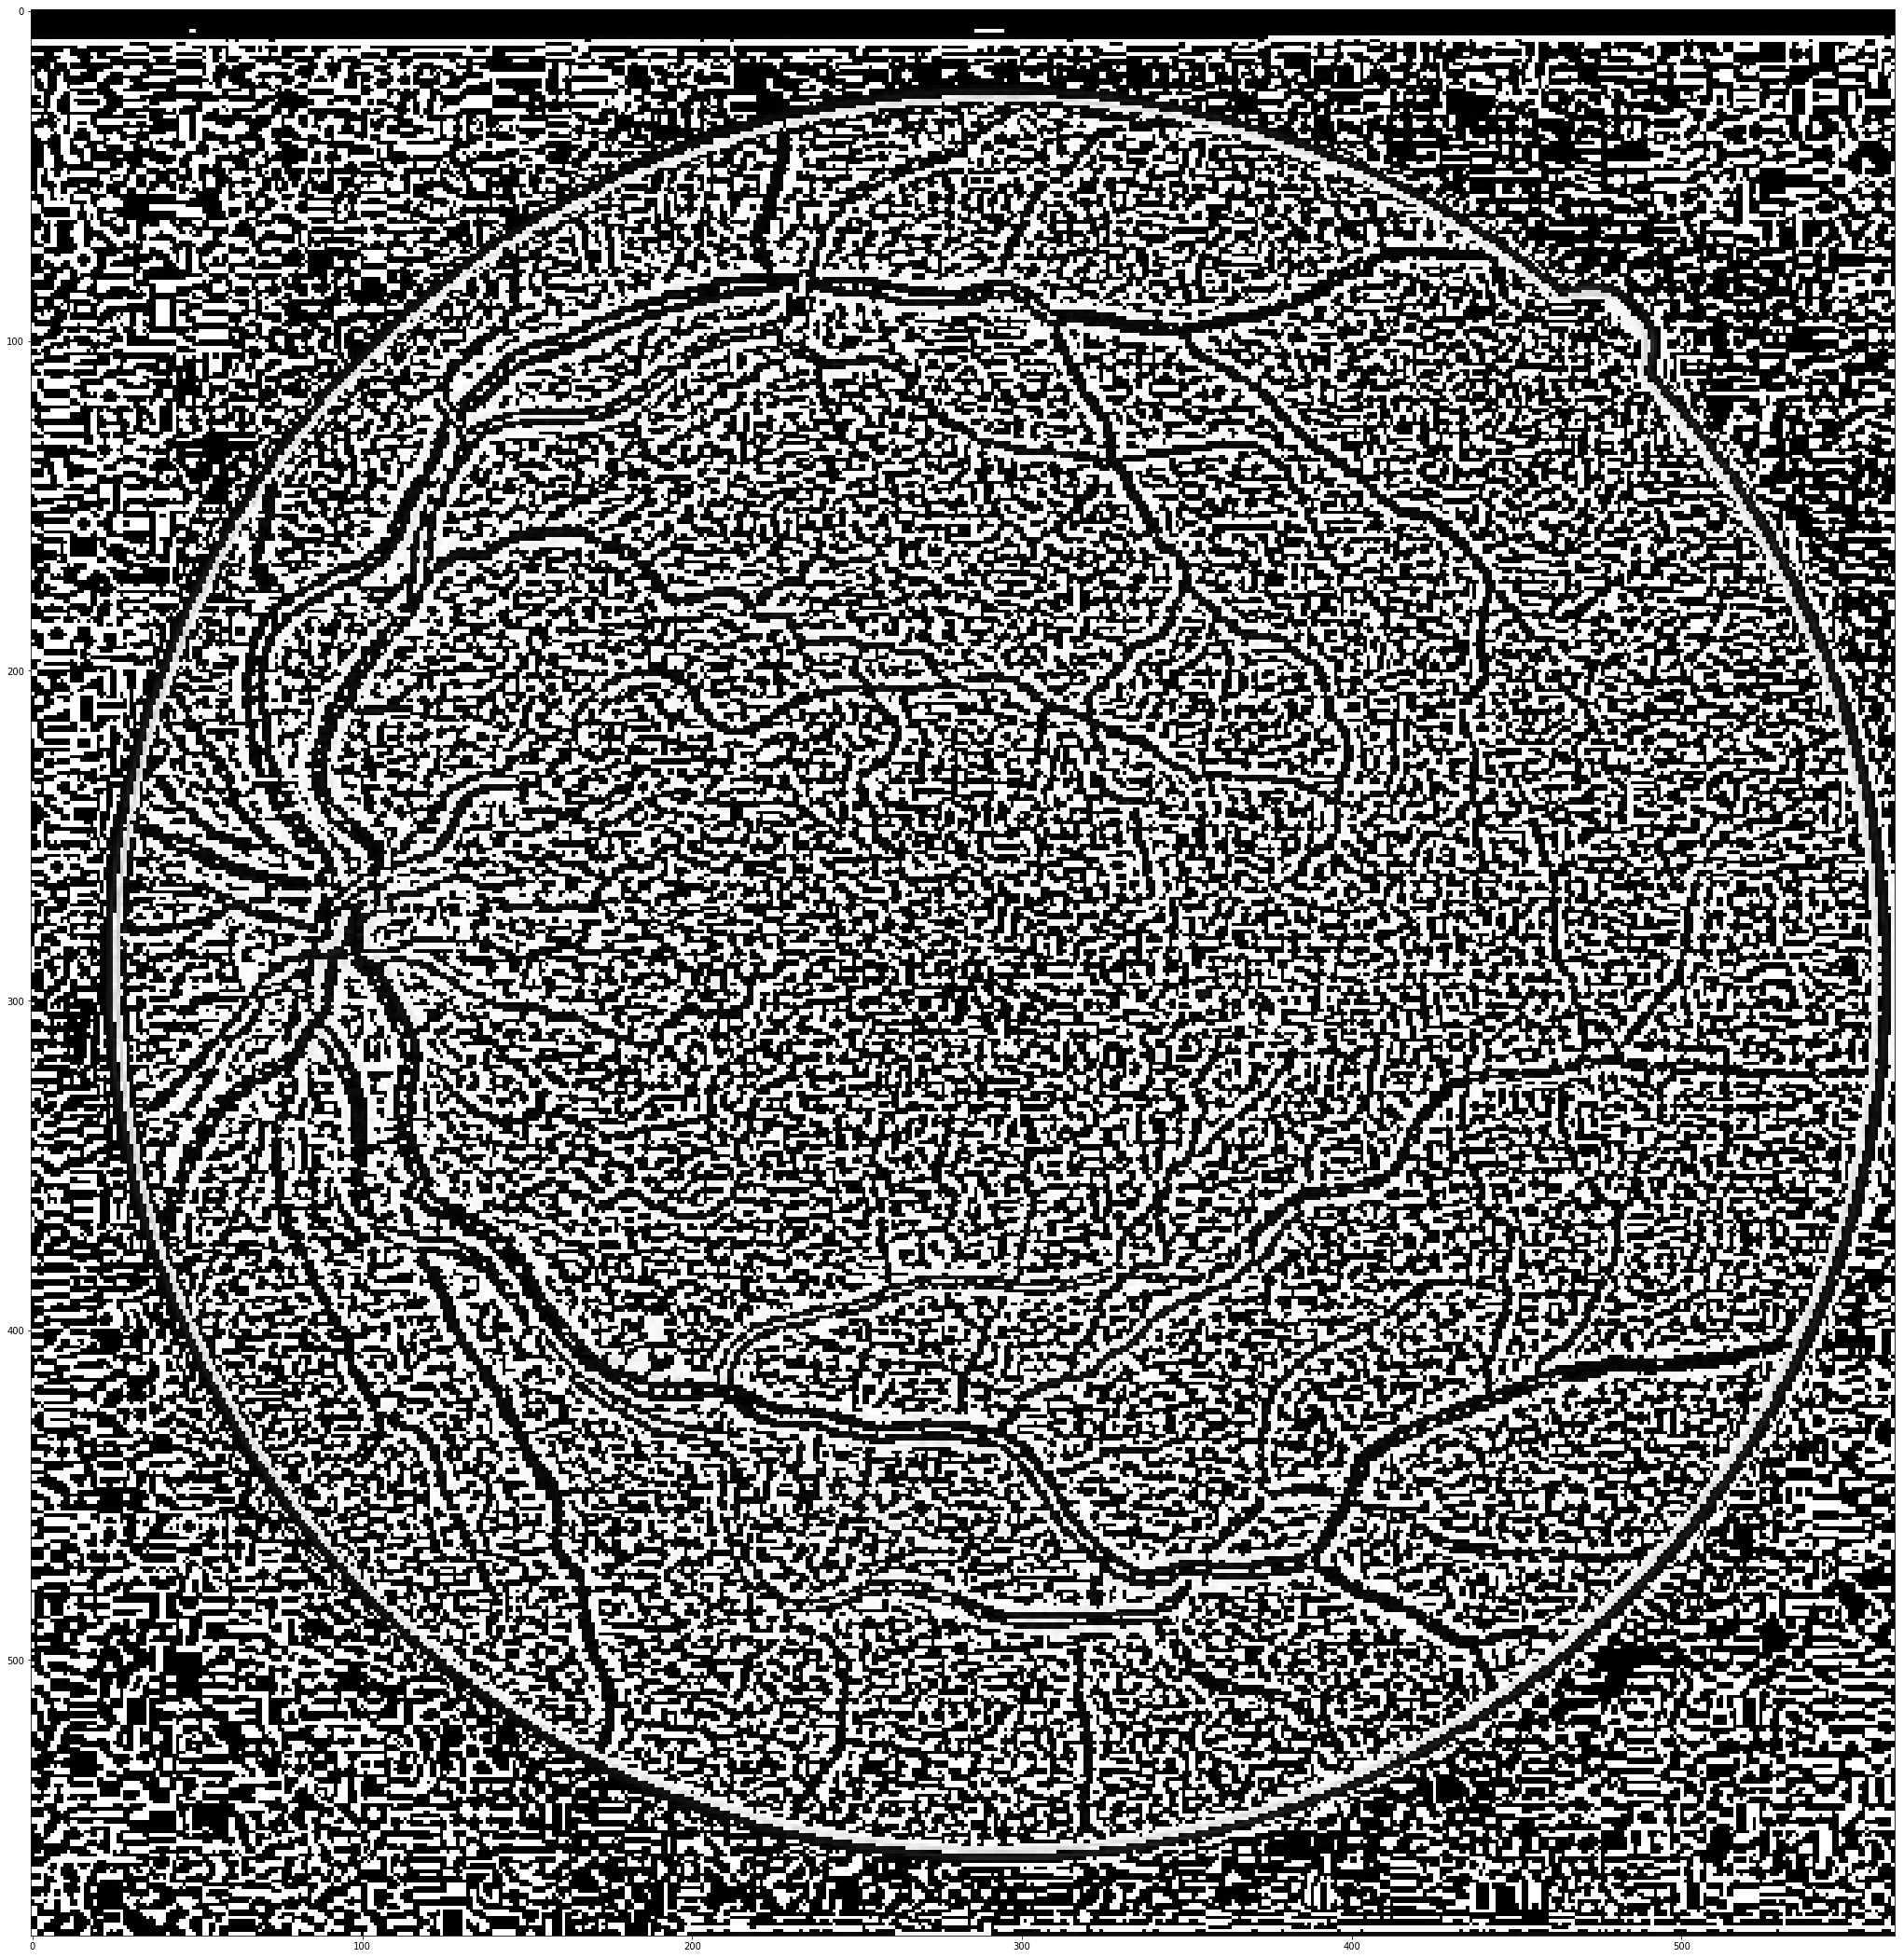

In [71]:
# take the difference between image and average 
#difference = cl1 - dst
difference = dst - cl1
plt.figure(figsize=(40,38),)
plt.imshow(difference,cmap="gray")

                       CLAHE (Contrast Limited Adaptive Histogram Equalization)

96.0
193
1


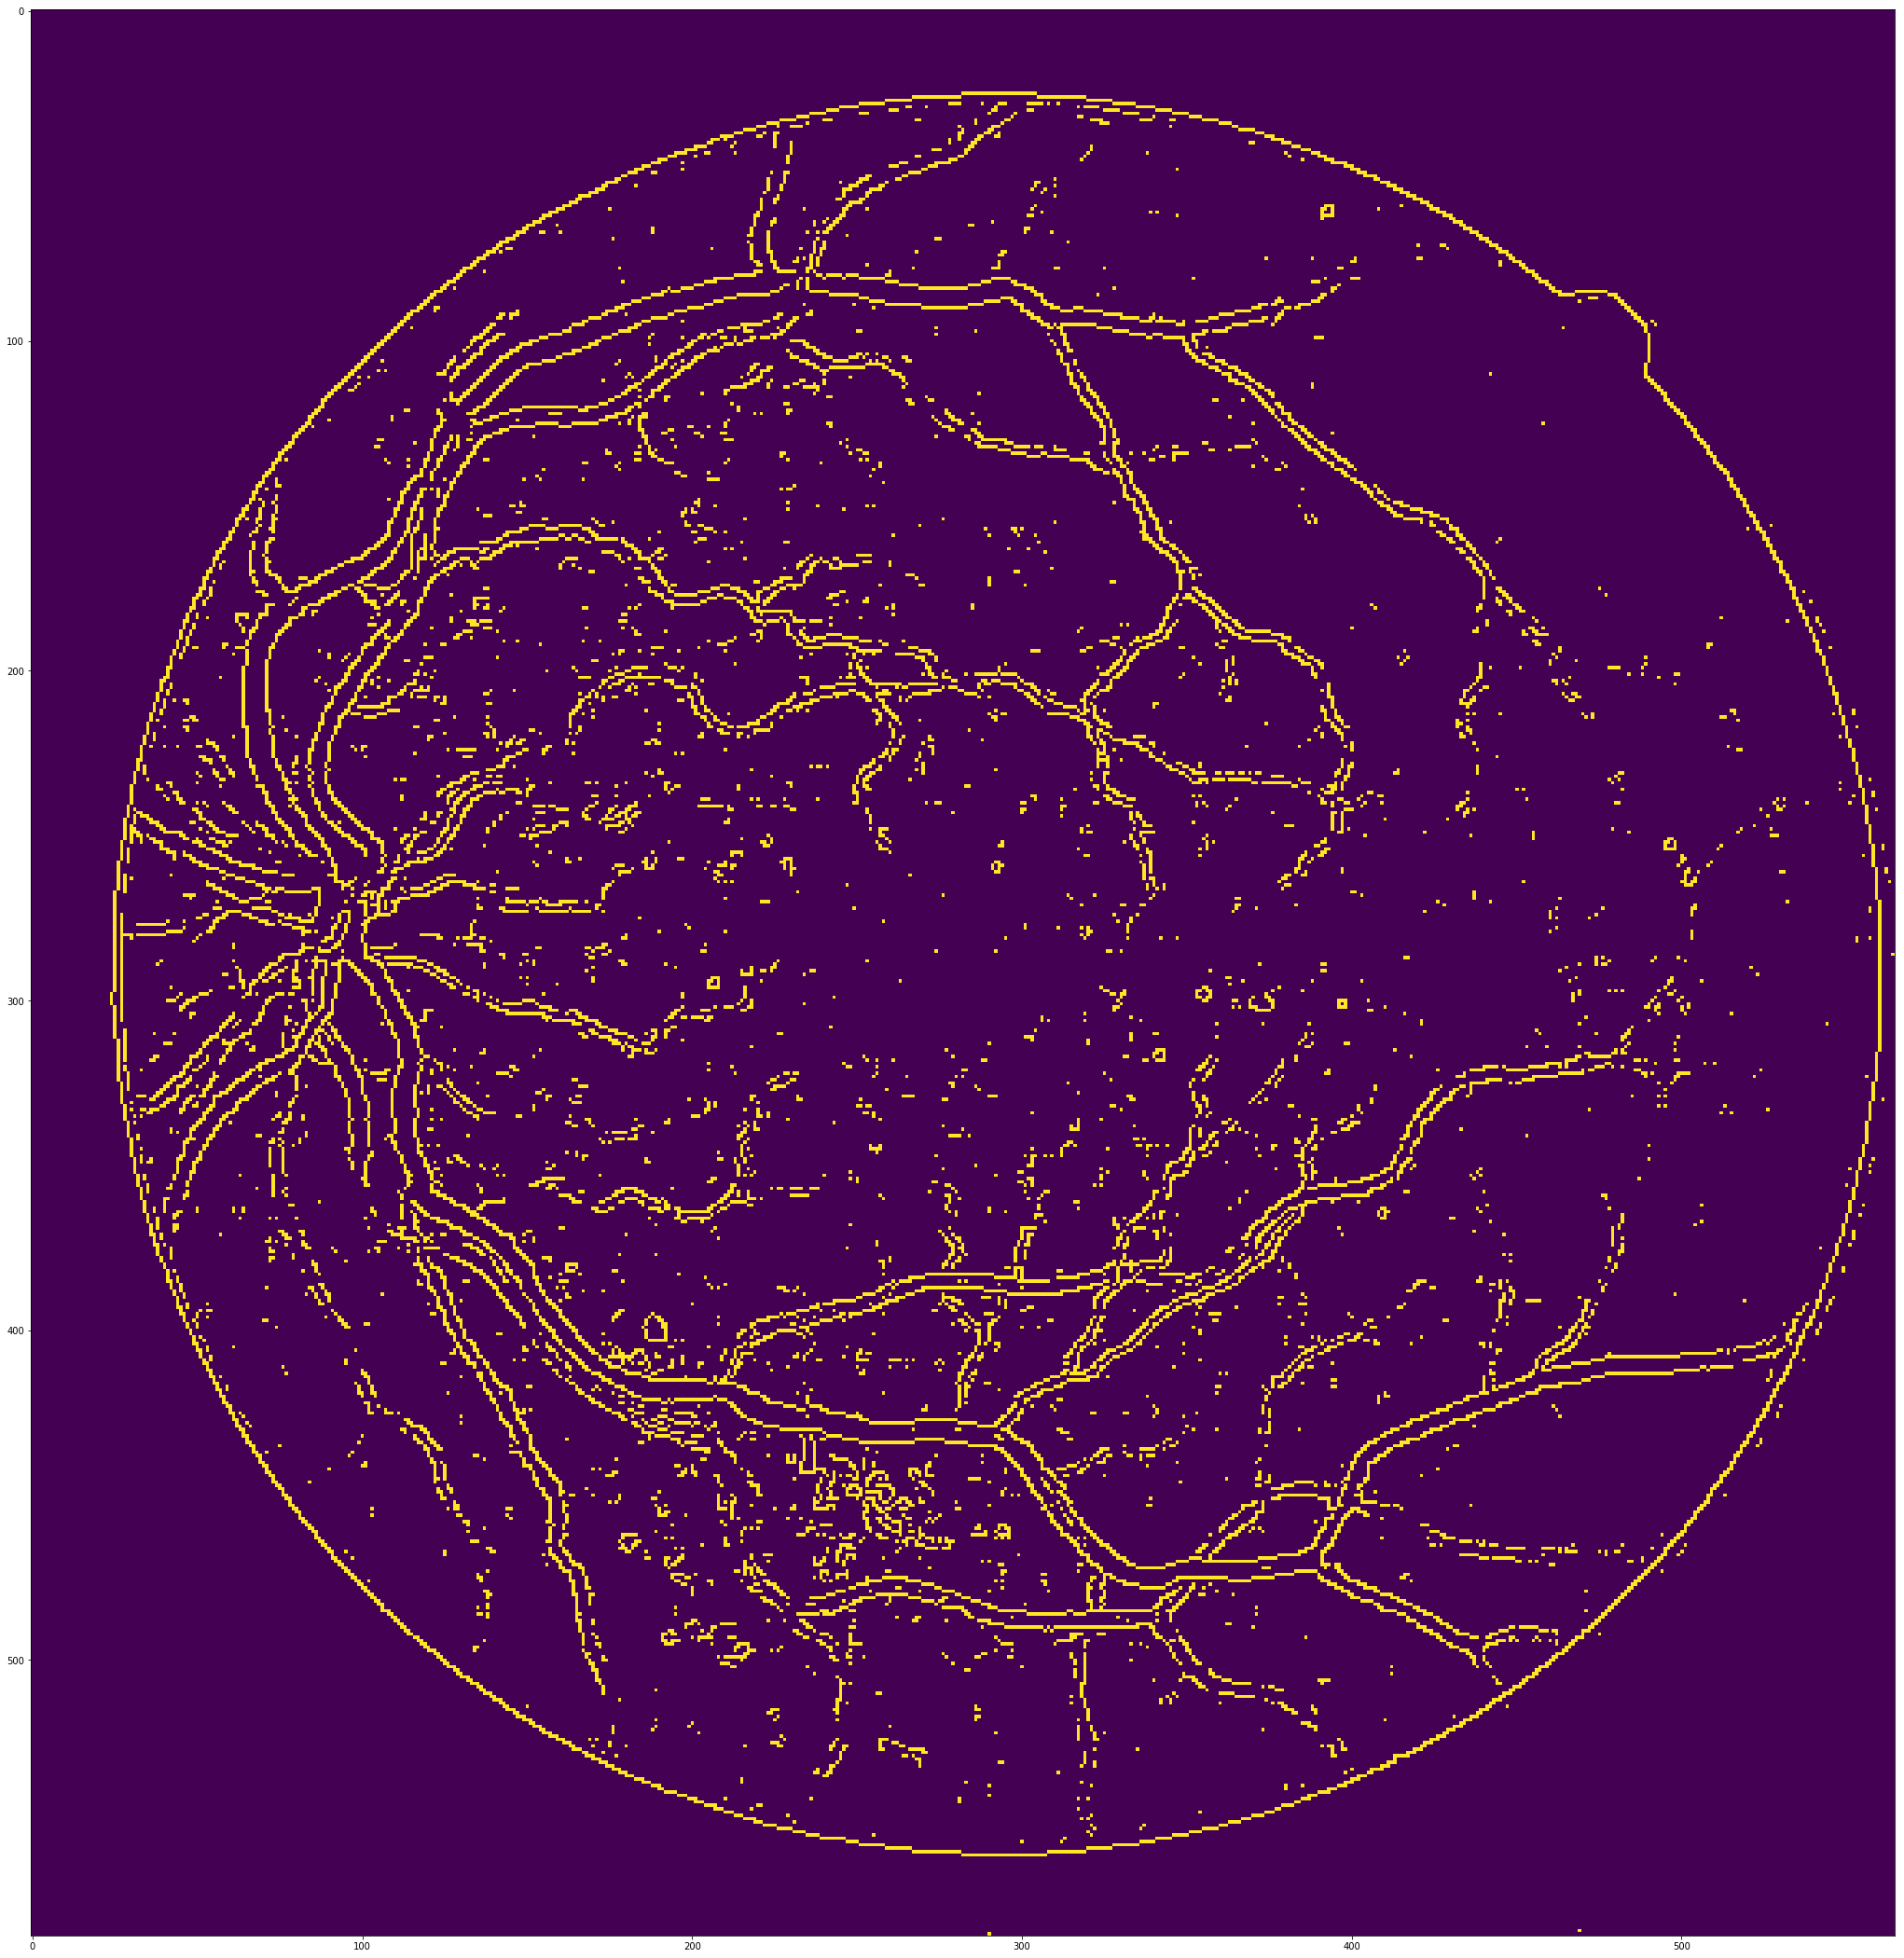

In [42]:
plt.figure(figsize=(40,38))
edges = cv2.Canny(cl1,100,100)
plt.imshow(edges)

v1 = np.median(cl1)
print(v1)
x_maximum = np.matrix(cl1)
print(x_maximum.max())
x = np.matrix(cl1)
print(x.min())

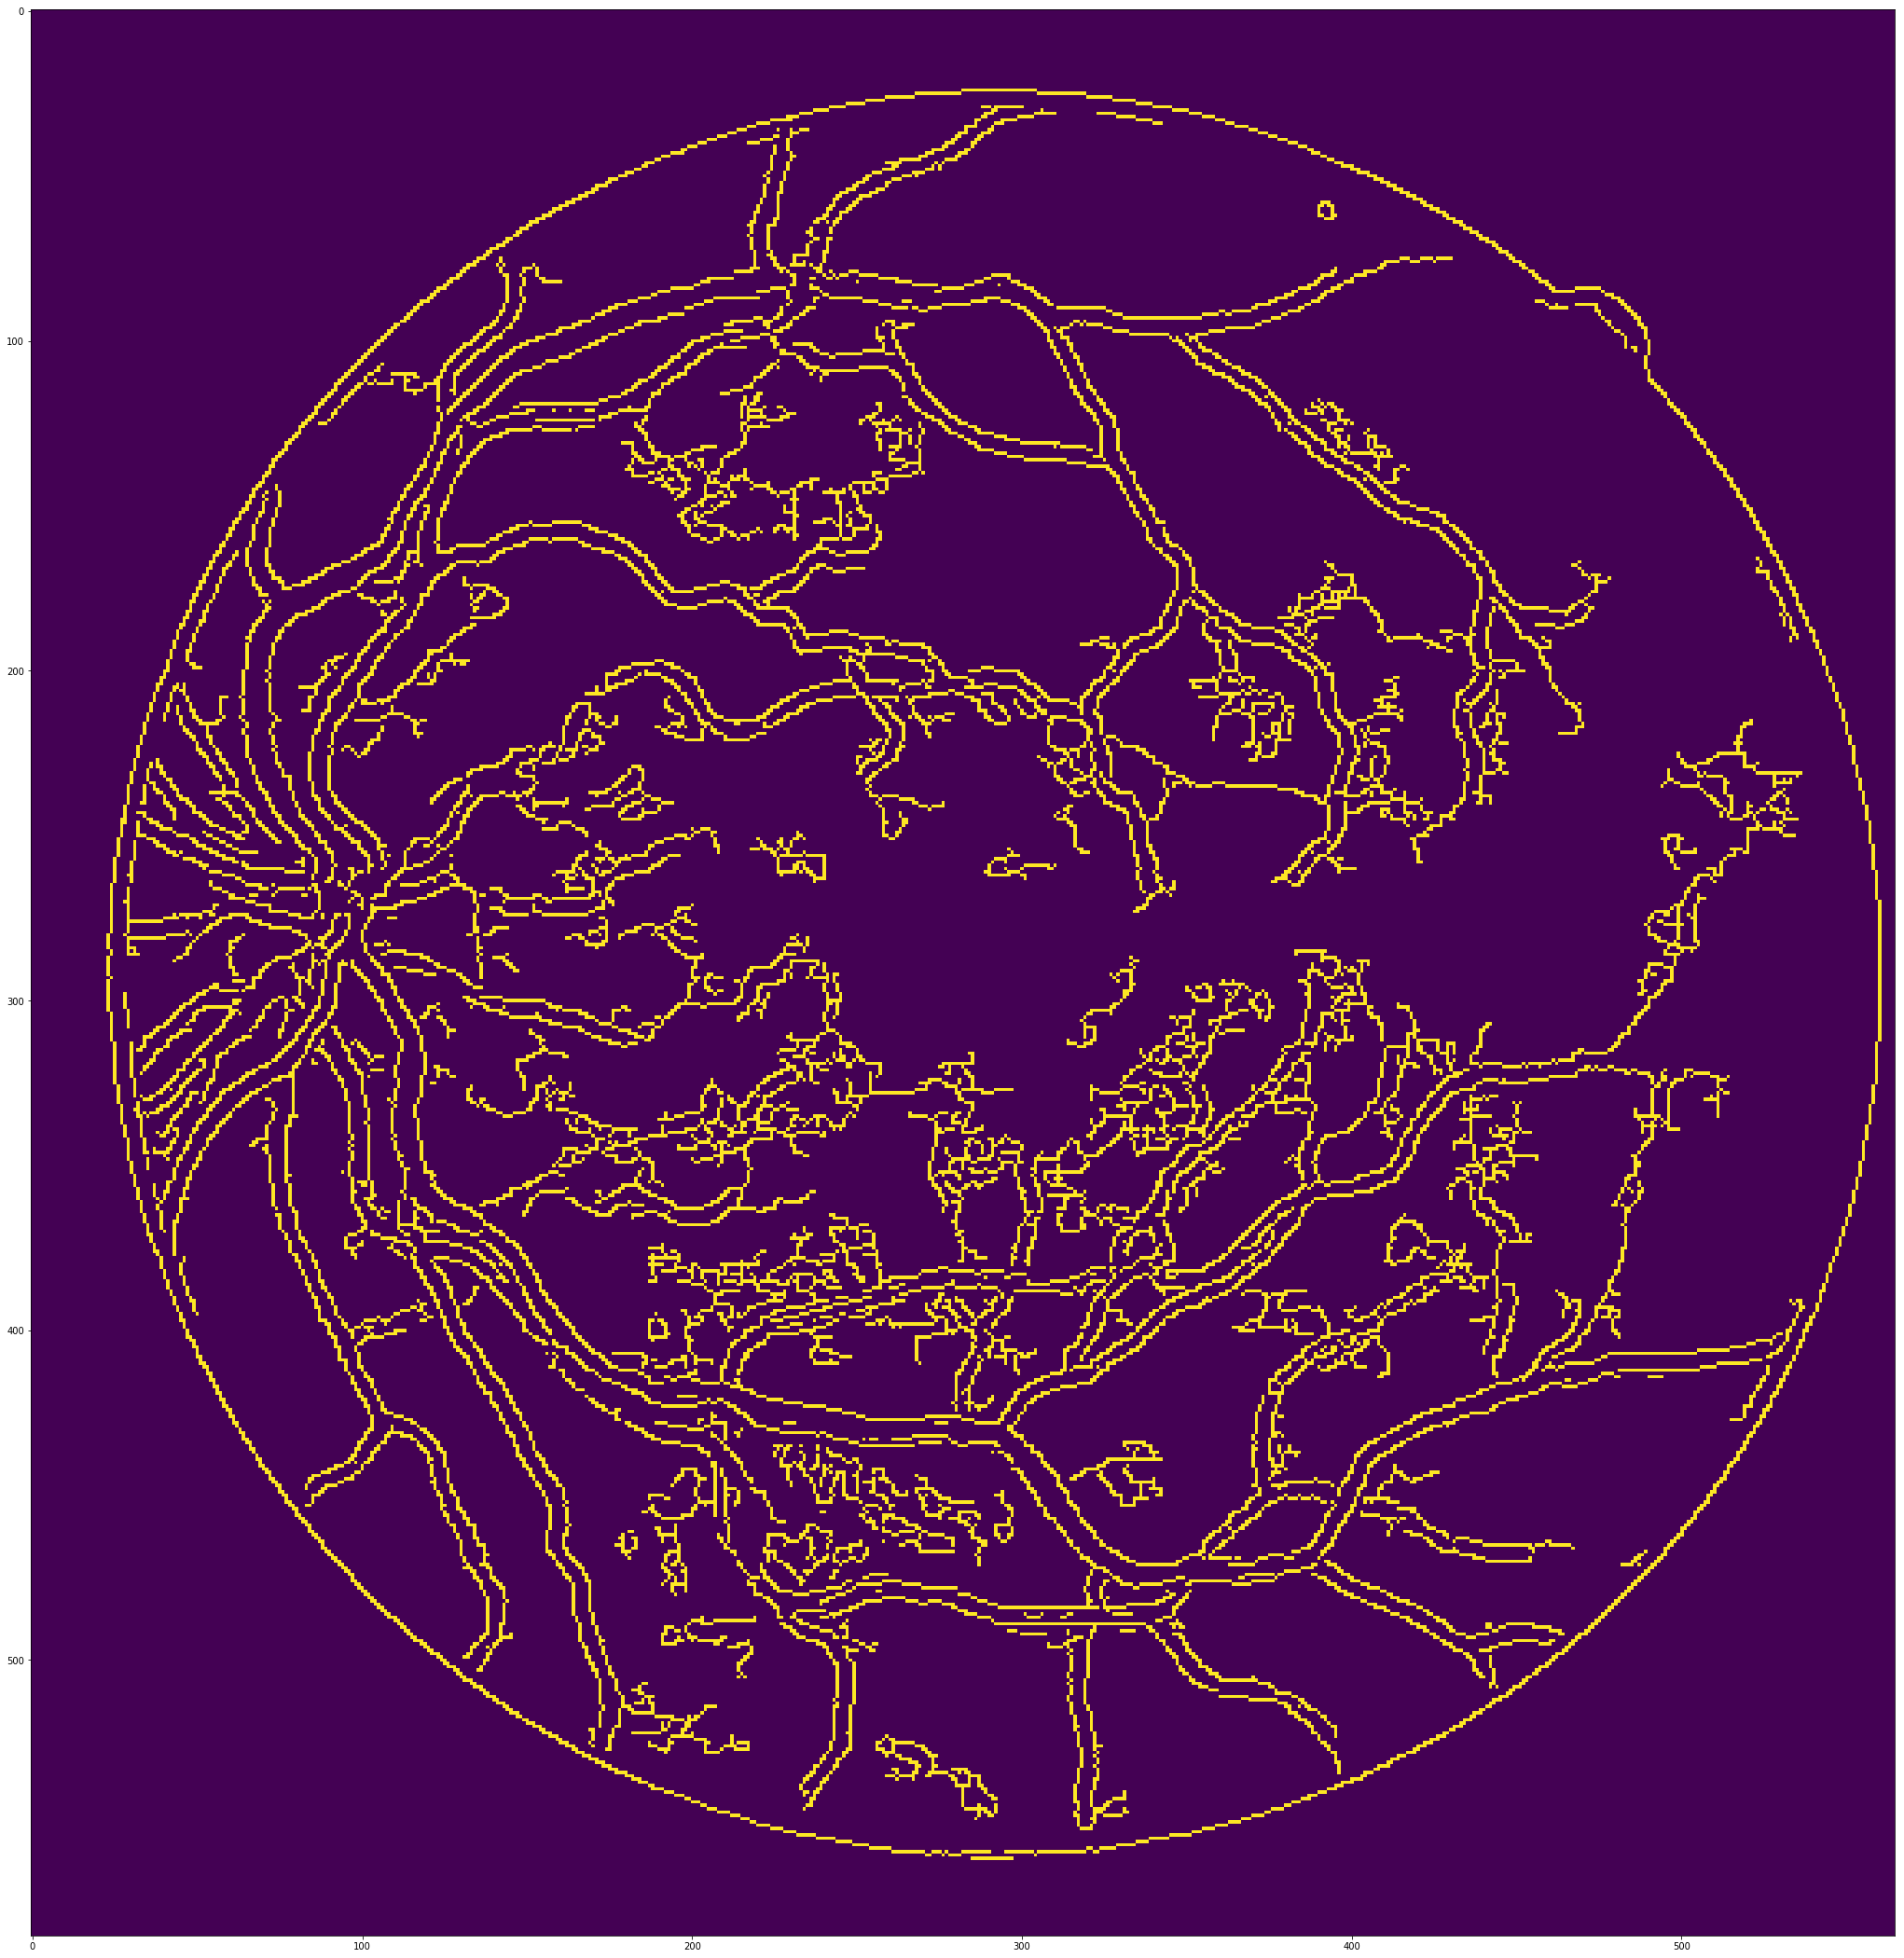

In [68]:
plt.figure(figsize=(40,38))
edges_of_average = cv2.Canny(dst,0,50)
plt.imshow(edges_of_average)



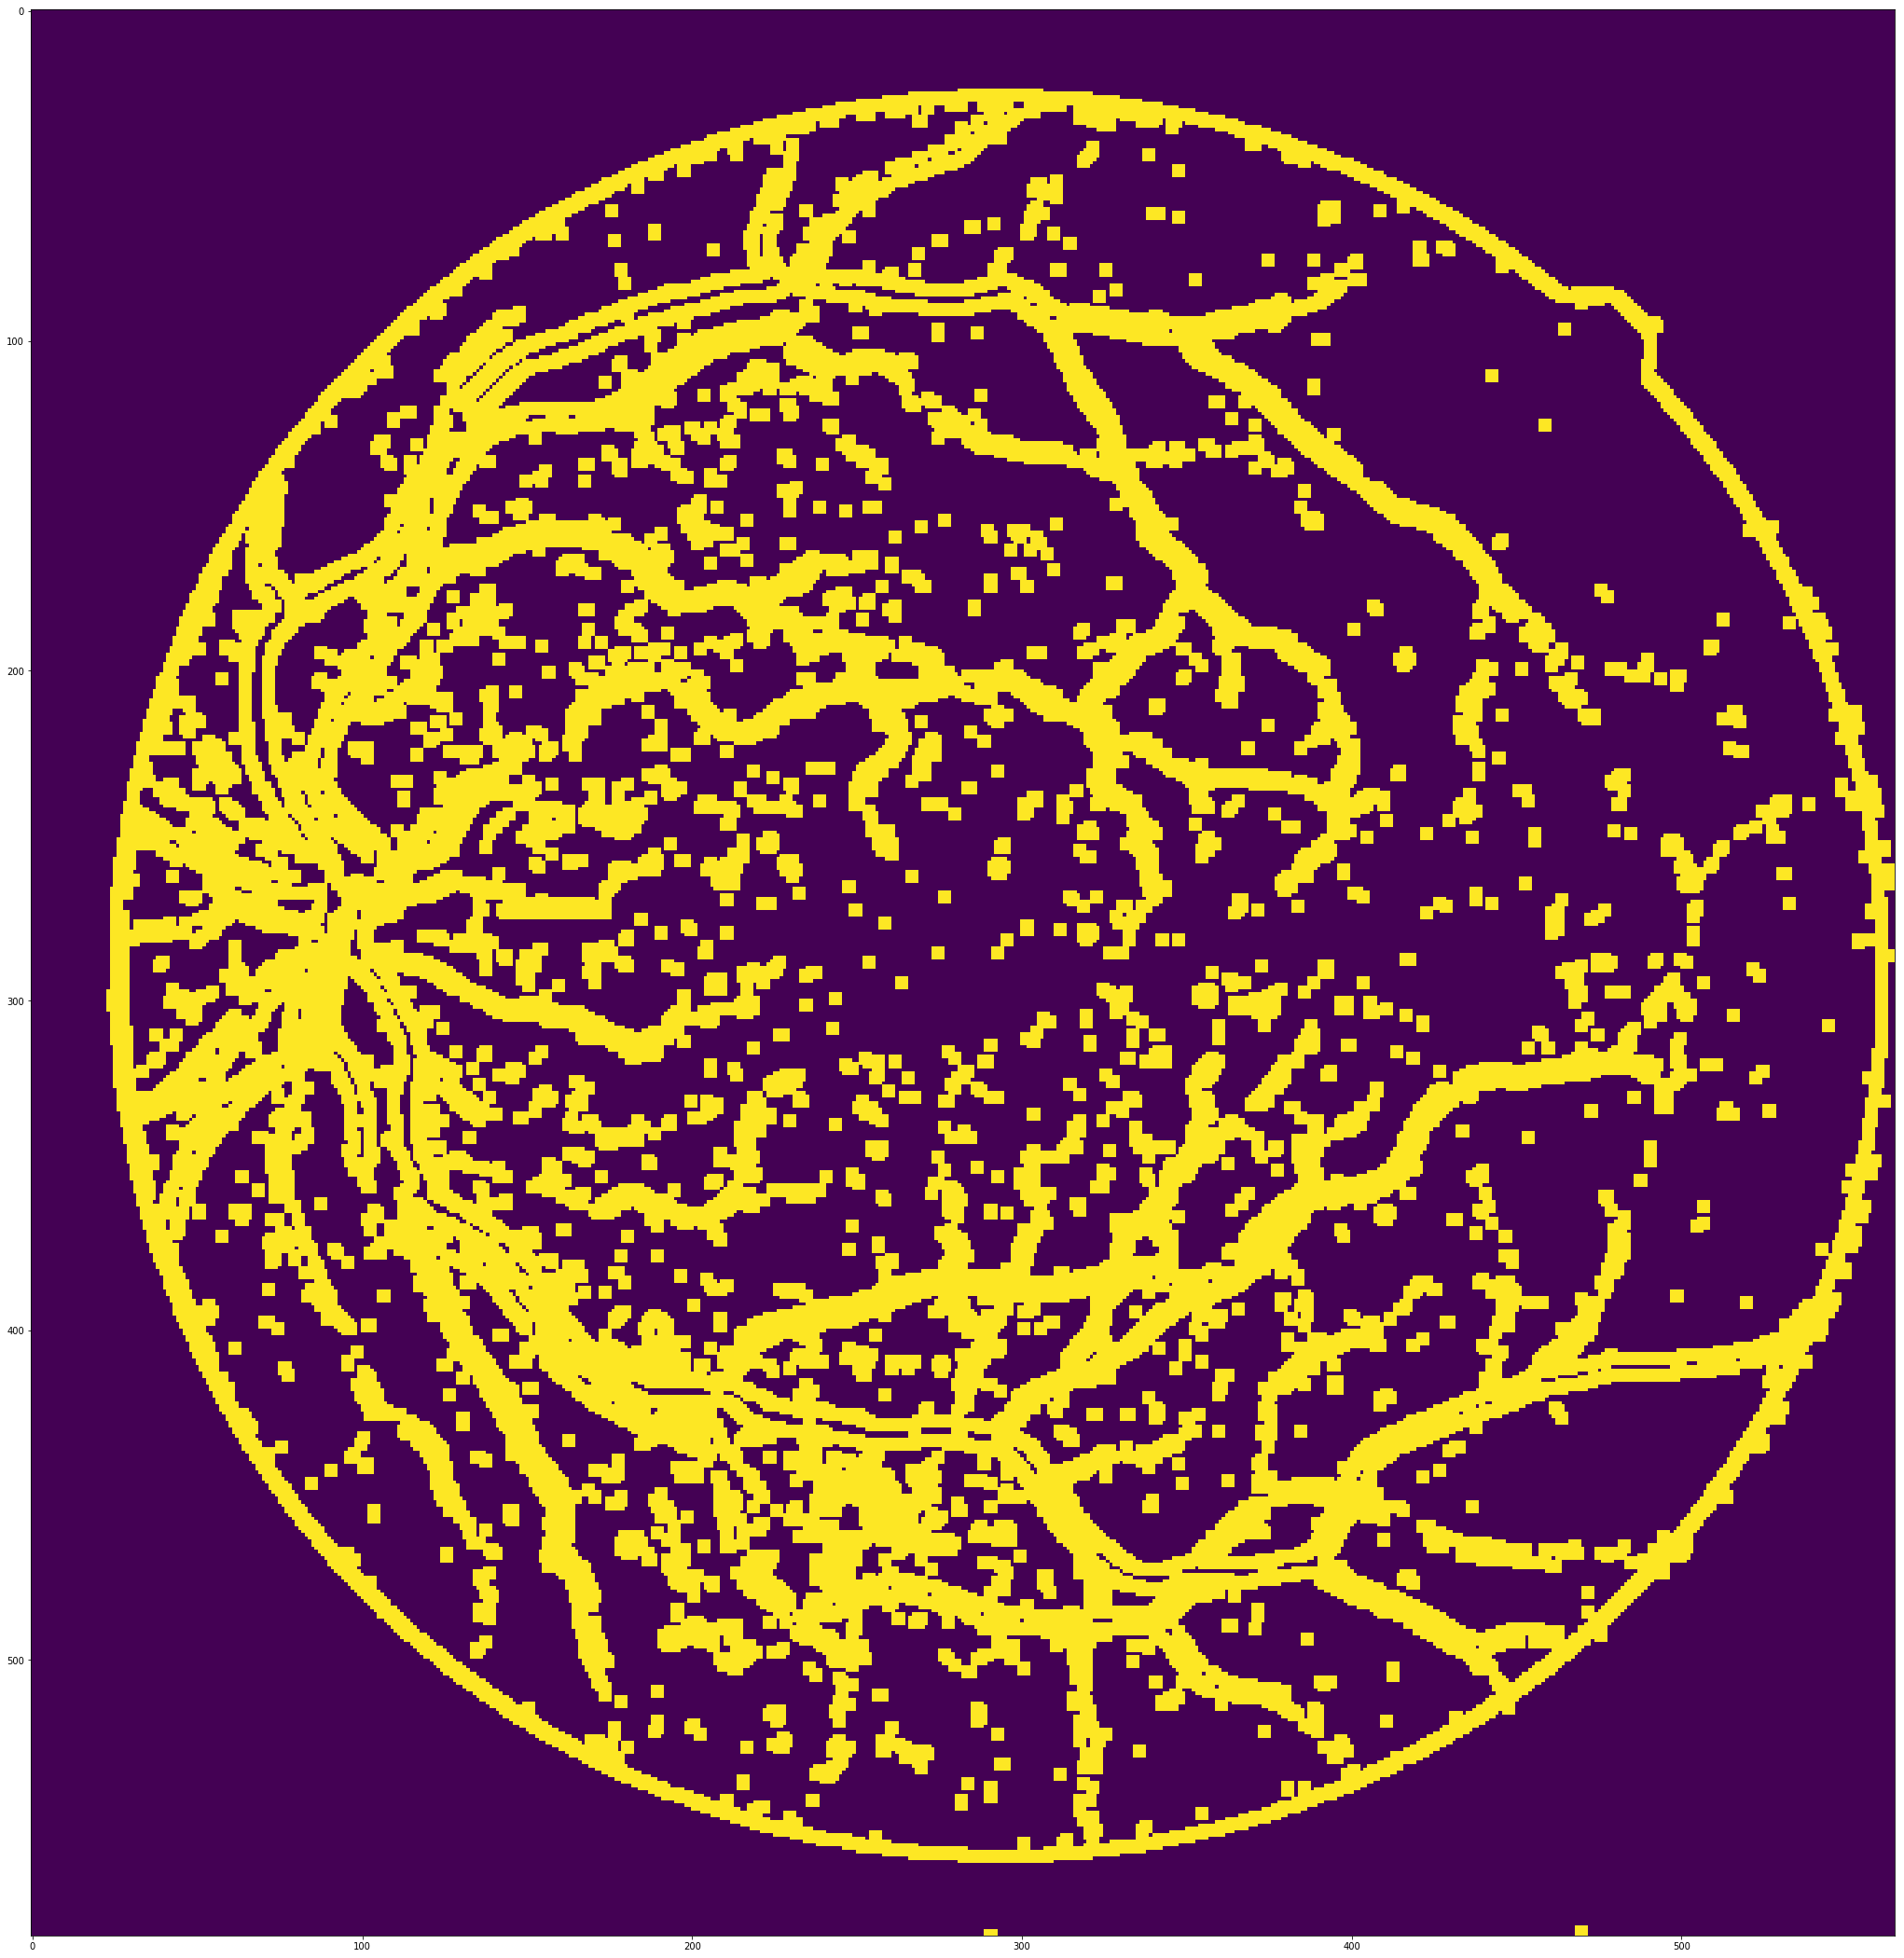

In [59]:
# fill up the vessel 
plt.figure(figsize=(40,38))
img_dilation = cv2.dilate(edges, np.ones((4, 4)))
plt.imshow(img_dilation)

/Applications/anaconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


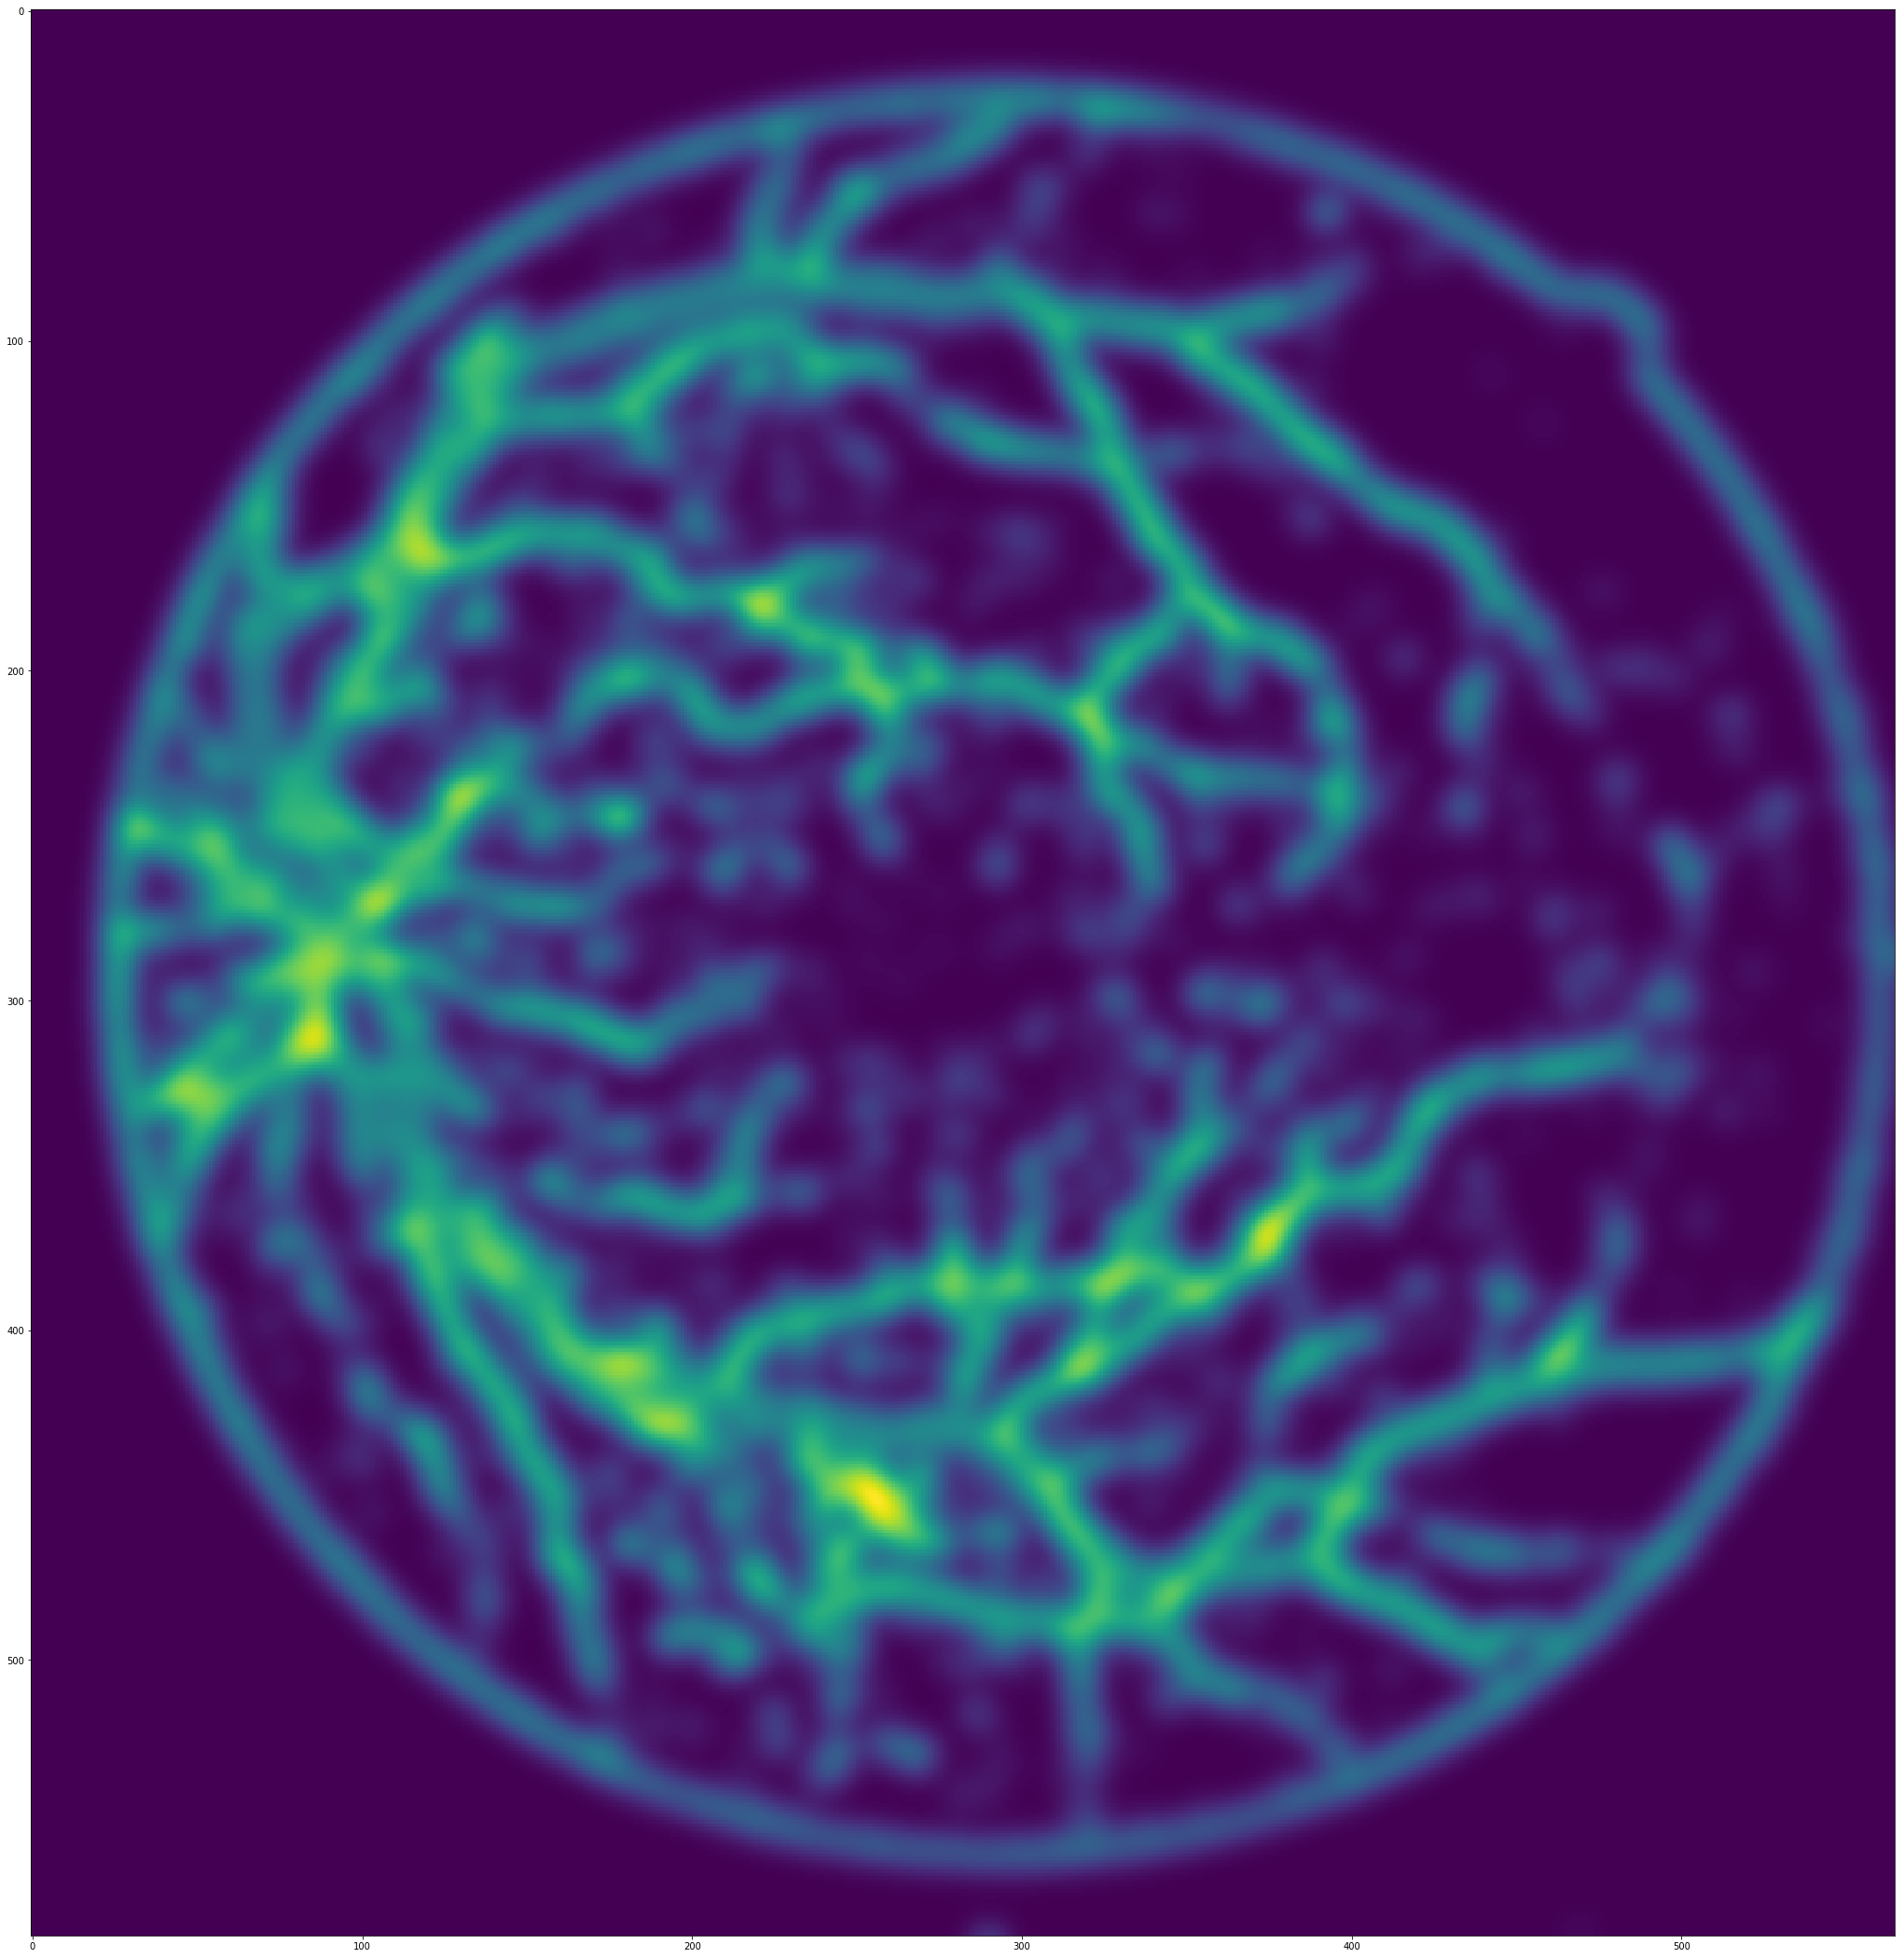

In [14]:
sigma = 5# --- complete here -- #
plt.figure(figsize=(40,38))
img_smooth = filters.gaussian_filter(edges,sigma)# --- complete here -- #
plt.imshow(img_smooth)

In [ ]:
sigma = 10# --- complete here -- #
plt.figure(figsize=(40,38))
img_smooth = filters.gaussian_filter(edges,sigma)# --- complete here -- #
plt.imshow(img_smooth)

In [16]:
#matrix of img_smooth
print(img_smooth)
# save to csv file 
df = pd.DataFrame(img_smooth)
df.to_csv('img_smooth.csv',index = False, header = False )

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


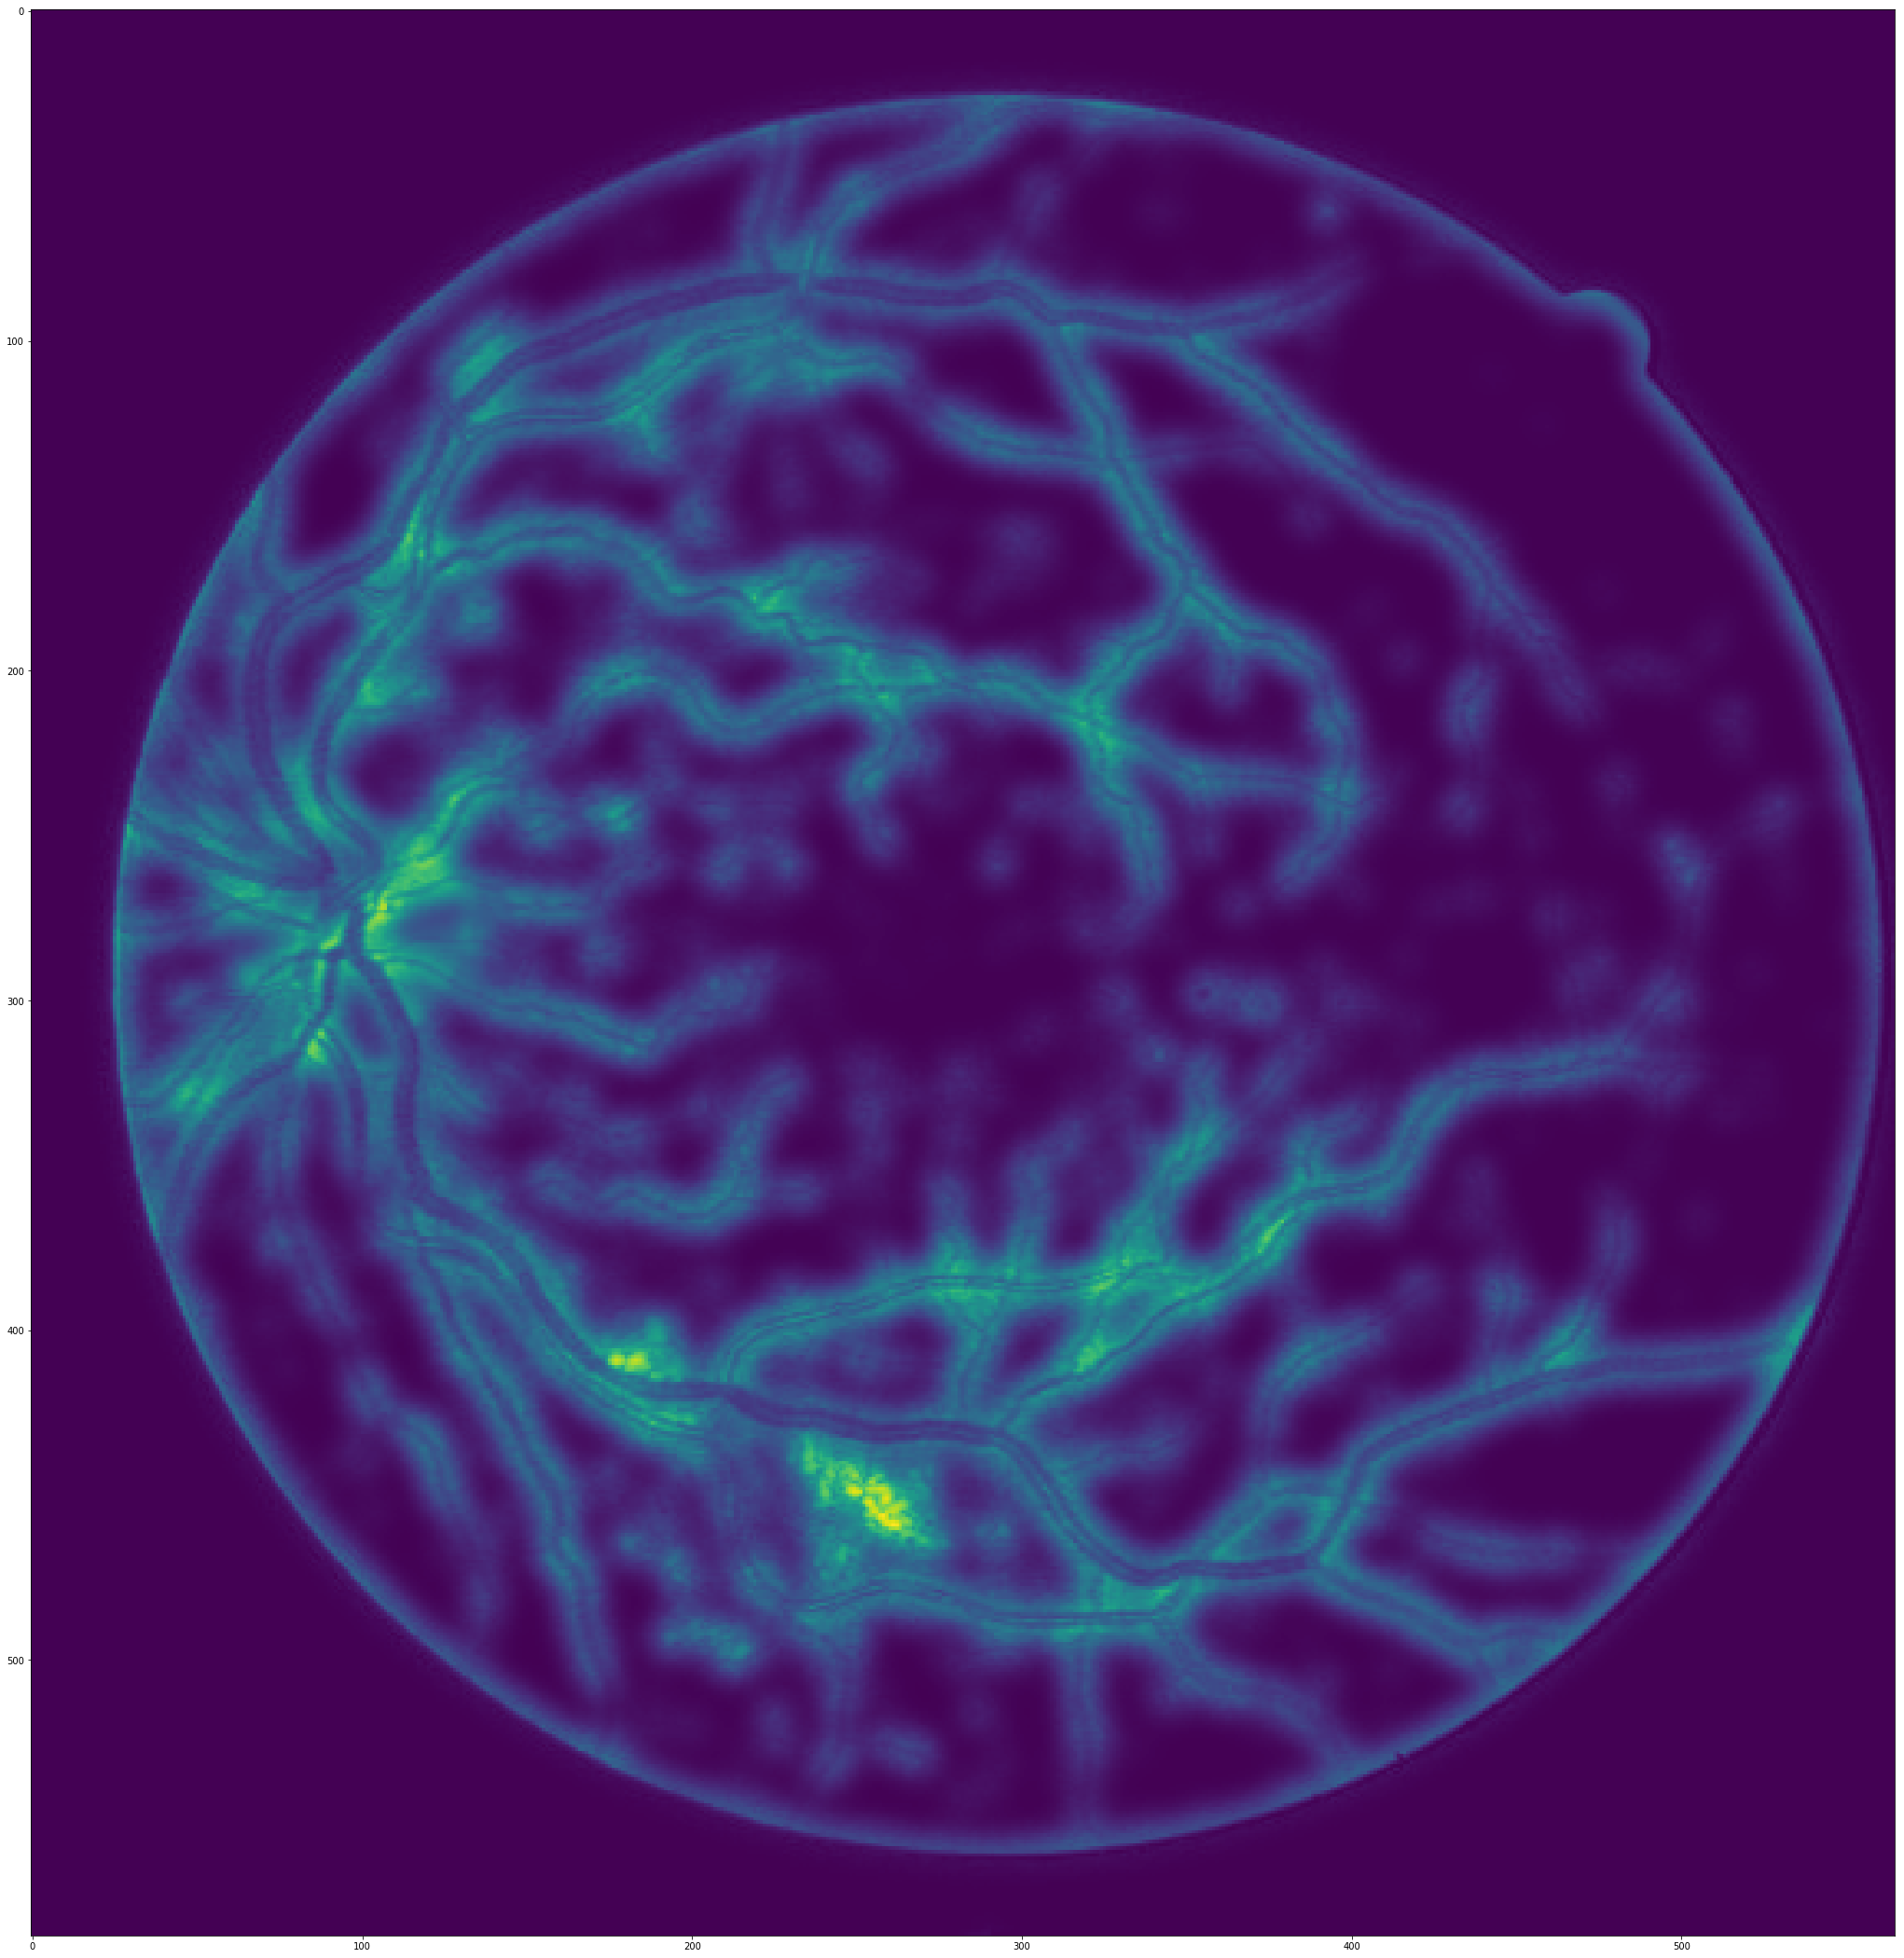

In [18]:
#smooth  x image 
canny_gaussian_blured_image = img_smooth* cl1

plt.figure(figsize=(40,38))
plt.imshow(canny_gaussian_blured_image)


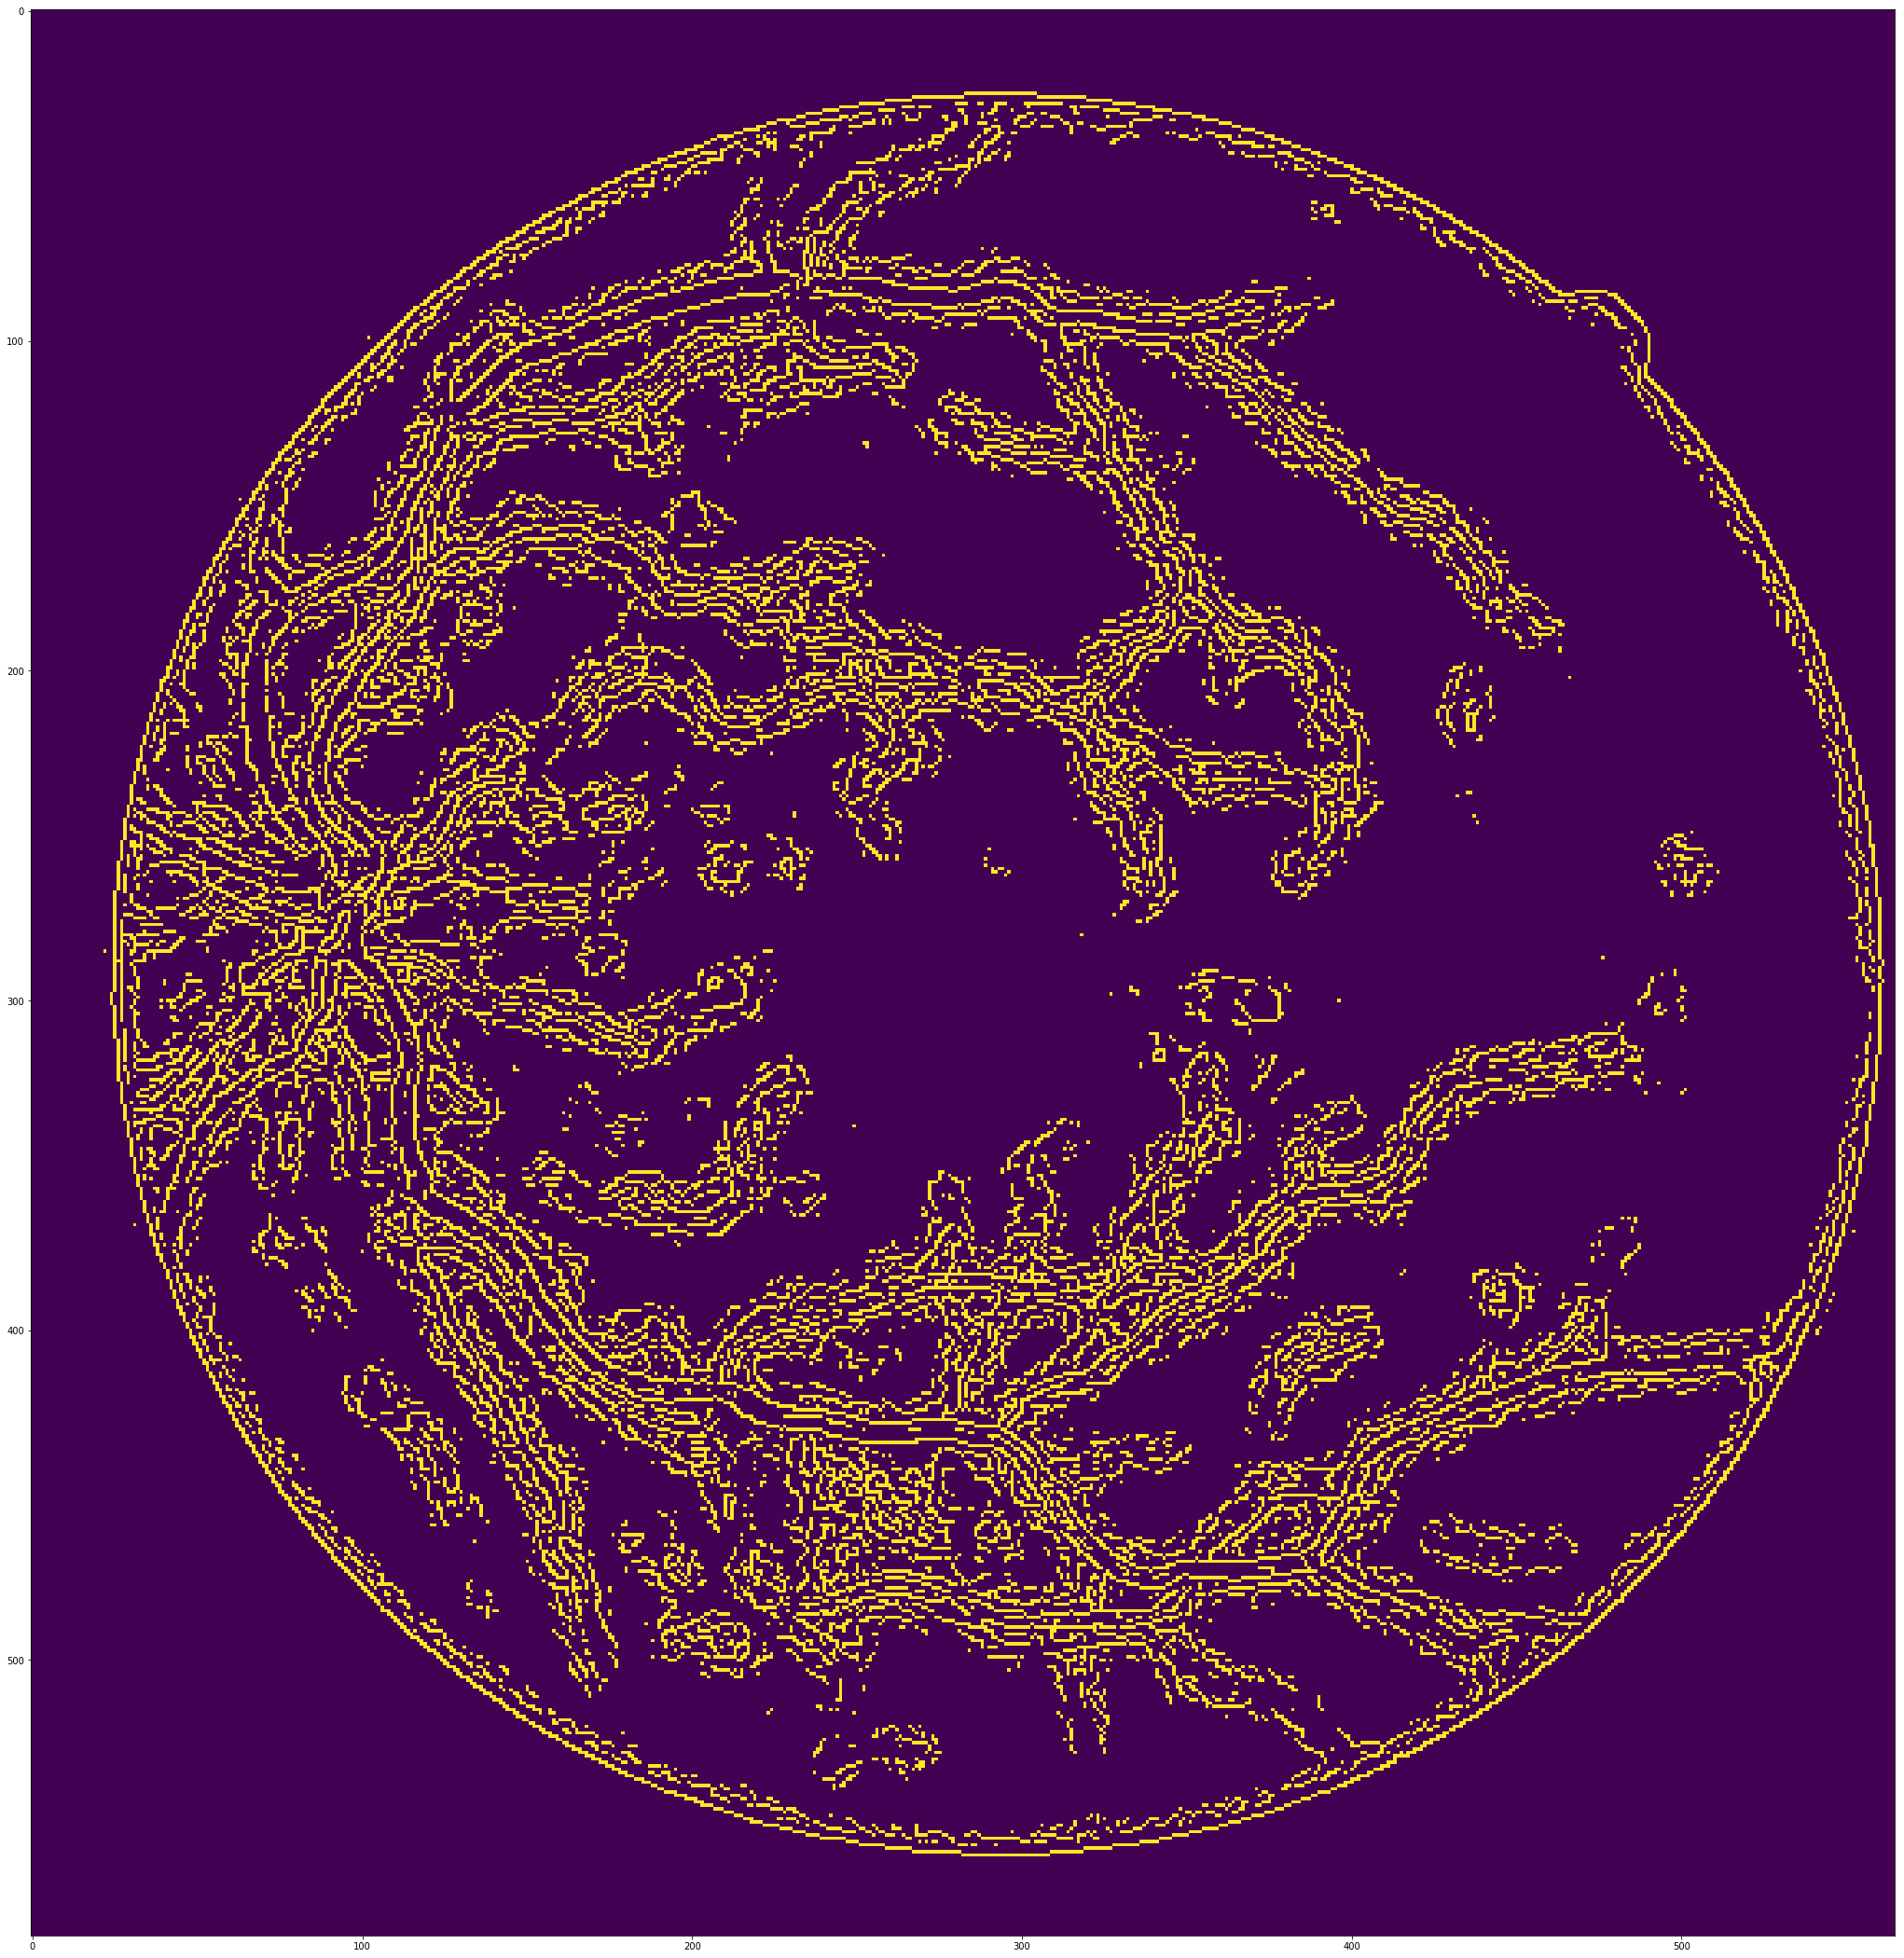

In [77]:
# doing canny again 
imgcast= np.uint8(canny_gaussian_blured_image)
plt.figure(figsize=(40,38))
edges2 = cv2.Canny(imgcast,10,10)
plt.imshow(edges2)

In [41]:
v1 = np.median(canny_gaussian_blured_image)
print(v1)
x_maximum = np.matrix(canny_gaussian_blured_image)
print(x_maximum.max())
x = np.matrix(canny_gaussian_blured_image)
print(x.min())

2.00283992268
51.642259256
0.0
